# Fuzzy logic introduction
## Installation: 
* pip install -U scikit-fuzzy
* pip install networkx==1.3
    * networkx==2.0 has drastical changes in the code

## Tasks:
* Make the tip recommendation system more interactive with annotator
* Make more fine grained levels, i.e. (bad,descent,great) -> (poor,bad,average,descent,great) and add rules for them
* Add new Antecednets variable: interior, quota and add rules for them


# The Tipping Problem
Taking the tipping example full circle, if we were to create a controller which estimates the tip we should give at a restaurant, we might structure it as such:

## Antecednets (Inputs)
* service
    * Universe (ie, crisp value range): How good was the service of the waitress, on a scale of 1 to 10?
    * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
* food quality
    * Universe: How tasty was the food, on a scale of 1 to 10?
    * Fuzzy set: bad, decent, great

## Consequents (Outputs)
* tip
    * Universe: How much should we tip, on a scale of 0% to 25%
    * Fuzzy set: low, medium, high
* Rules
    * IF the service was good or the food quality was good, THEN the tip will be high.
    * IF the service was average, THEN the tip will be medium.
    * IF the service was poor and the food quality was poor THEN the tip will be low.
* Usage
    * If I tell this controller that I rated:
        * the service as 9.8, and
        * the quality as 6.5,
    * it would recommend I leave:
        * a 20.2% tip.

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


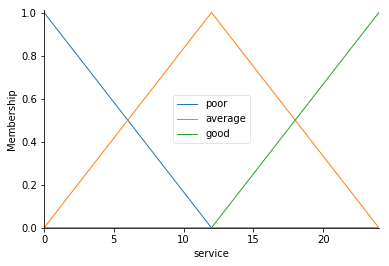

In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 25, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 25, 1), 'service')
food = ctrl.Antecedent(np.arange(0, 10, 1), 'food')
tip = ctrl.Consequent(np.arange(0, 25, 1), 'tip')


# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(5)
service.automf(3)



# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 6])
tip['mediocre'] = fuzz.trimf(tip.universe, [0, 6,12])
tip['medium'] = fuzz.trimf(tip.universe, [6, 12, 18])
tip['good'] = fuzz.trimf(tip.universe, [12, 18, 25])
tip['high'] = fuzz.trimf(tip.universe, [18, 25, 25])

service.view()


/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


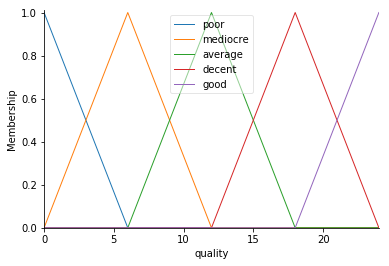

In [39]:
# You can see how these look with .view()
%matplotlib inline
quality.view()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


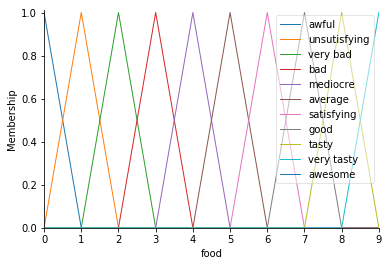

In [40]:
%matplotlib inline


food['awful'] = fuzz.trimf(food.universe, [0, 0, 1])
food['unsutisfying'] = fuzz.trimf(food.universe, [0, 1, 2])
food['very bad'] = fuzz.trimf(food.universe, [1, 2, 3])
food['bad'] = fuzz.trimf(food.universe, [2, 3, 4])
food['mediocre'] = fuzz.trimf(food.universe, [3, 4, 5])
food['average'] = fuzz.trimf(food.universe, [4, 5, 6])
food['satisfying'] = fuzz.trimf(food.universe, [5, 6, 7])
food['good'] = fuzz.trimf(food.universe, [6, 7, 8])
food['tasty'] = fuzz.trimf(food.universe, [7, 8, 9])
food['very tasty'] = fuzz.trimf(food.universe, [8, 9, 10])
food['awesome'] = fuzz.trimf(food.universe, [9, 10, 10])

food.view()

In [41]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'] | food['awful'], tip['low'])
rule2 = ctrl.Rule(quality['mediocre'] |service['average'] | food['bad'], tip['mediocre'])
rule3 = ctrl.Rule(service['average'] | quality['average'] | food['satisfying'], tip['medium'])
rule4 = ctrl.Rule(quality['decent'] |service['good'] | food['tasty'], tip['good'])
rule5 = ctrl.Rule(quality['good'] |service['good'] | food['awesome'], tip['high'])


In [42]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [58]:
from ipywidgets import interact_manual
@interact_manual

def getInput(quality = 8.34 , service = 8.34, food = 3.34):
    tipping.input['quality'] = quality
    tipping.input['service'] = service
    tipping.input['food'] = food

# Crunch the numbers
    tipping.compute()

A Jupyter Widget

Recommended tip 18.8770226537


/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


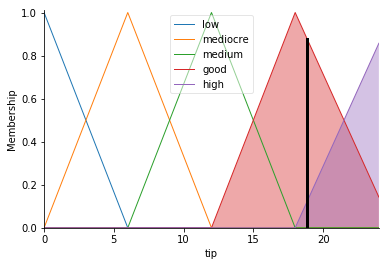

In [59]:
print('Recommended tip',tipping.output['tip'])
tip.view(sim=tipping)